### ANALISI ESPLORATIVA

IMPORTAZIONE LIBRERIE E LETTURA CSV

In [2]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVR
df = pd.read_csv("datasets/database_ultimate.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'database_ultimate.csv'

PAIRPLOT

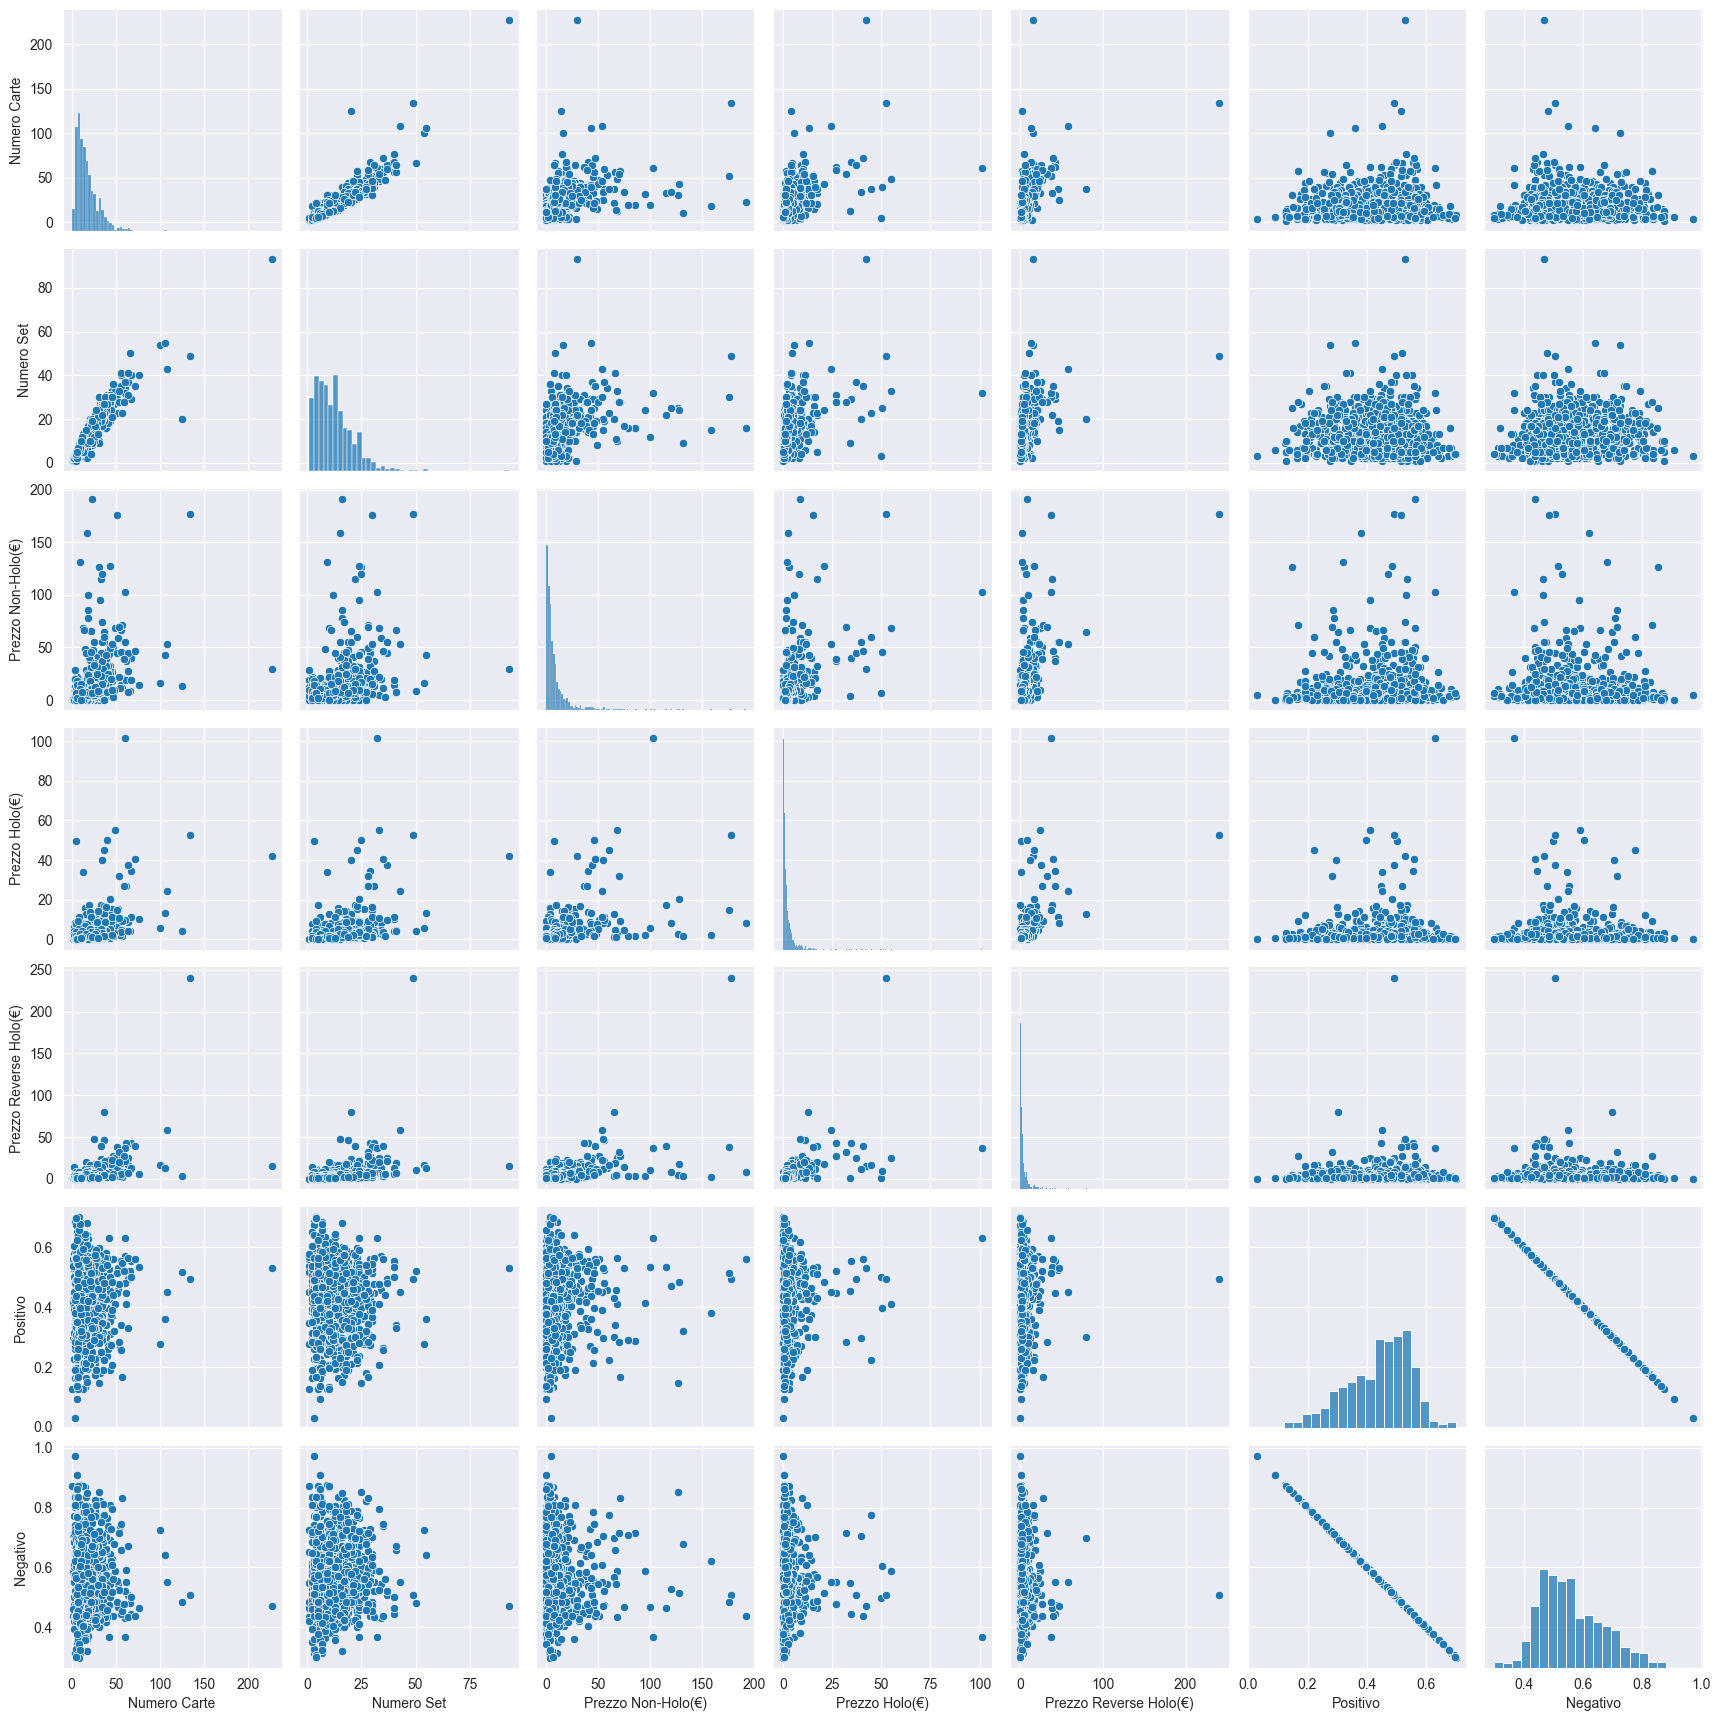

In [38]:
sns.pairplot(df) 
plt.show()

CORRPLOT

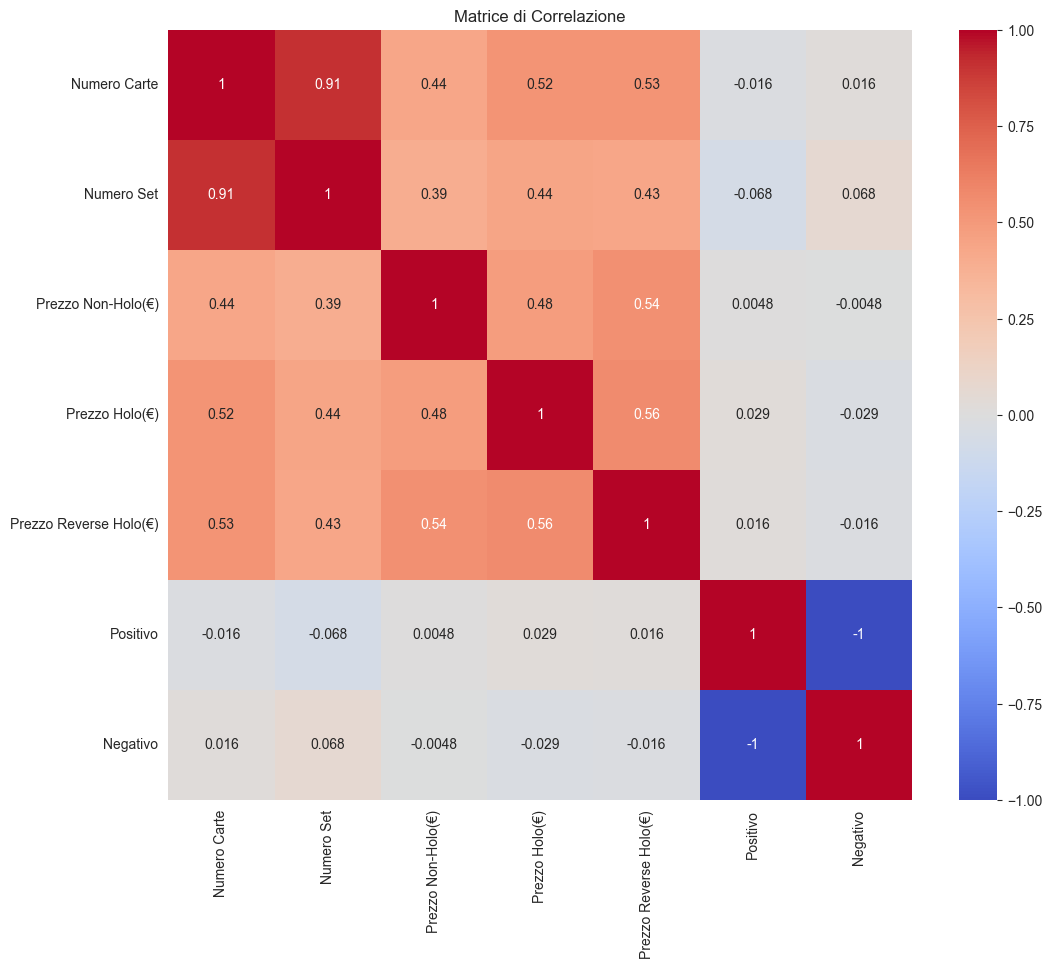

In [39]:
df.drop(columns=['Pokemon','Generazione Pokemon',],inplace=True)
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice di Correlazione')
plt.show()

BOXPLOT

In [40]:
df = pd.read_csv("datasets/database_ultimate.csv")
df['Generazione Pokemon'] = df['Generazione Pokemon'].astype('category')


boxplot1 = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('Generazione Pokemon', title='Generazione Pokemon'),
    y=alt.Y('Prezzo Non-Holo(€)', title='Prezzo Non-Holo(€)'),
    color=alt.Color('Generazione Pokemon', scale=alt.Scale(scheme='category10'))
).properties(
    title='Boxplot 1',
    width=330,
    height=600,
)

boxplot2 = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('Generazione Pokemon', title='Generazione Pokemon'),
    y=alt.Y('Prezzo Holo(€)', title='Prezzo Holo(€)'),
    color=alt.Color('Generazione Pokemon', scale=alt.Scale(scheme='category10'))
).properties(
    title='Boxplot 2',
    width=330,
    height=600,
)

boxplot3 = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('Generazione Pokemon', title='Generazione Pokemon'),
    y=alt.Y('Prezzo Reverse Holo(€)', title='Prezzo Reverse Holo(€)'),
    color=alt.Color('Generazione Pokemon', scale=alt.Scale(scheme='category10'))
).properties(
    title='Boxplot 3',
    width=330,
    height=600,
)


boxplot_combination = boxplot1|boxplot2|boxplot3


boxplot_combination.save('boxplot_combined.png')


SCATTERPLOT

In [41]:
data1 = {'x': df['Positivo'], 'y': df['Prezzo Reverse Holo(€)']}
df1 = pd.DataFrame(data1)


chart1 = alt.Chart(df1).mark_circle(size=60).encode(
    x=alt.X('x', title='Positivo'), 
    y=alt.Y('y', title='Prezzo Reverse Holo (€)'),  
    color=alt.value('blue'),
    tooltip=['x', 'y']  
).properties(
    title='Scatter Plot 1'
)

data2 = {'x': df['Numero Carte'], 'y': df['Prezzo Reverse Holo(€)']}
df2 = pd.DataFrame(data2)


chart2 = alt.Chart(df2).mark_circle(size=60).encode(
    x=alt.X('x', title='Numero Carte'), 
    y=alt.Y('y', title='Prezzo Reverse Holo (€)'),  
    color=alt.value('blue'),
    tooltip=['x', 'y']  
).properties(
    title='Scatter Plot 2'
)

combined_chart=chart1|chart2
combined_chart.save('combined_chart.png')

### ANALISI INFERENZIALE

SUPPORT VECTOR REGRESSION (SVR)

In [42]:
'''Preparazione dati'''

X = df[['Positivo']]
y = df['Prezzo Reverse Holo(€)']


'''Divisione in train e test set'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'''Normalizzazione'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


'''linear kernel'''
svr_linear = SVR(kernel='linear')

'''polynomial kernel'''
svr_poly = SVR(kernel='poly')

'''radial kernel'''
svr_rbf = SVR(kernel='rbf')

'''sigmoid kernel'''
svr_sigmoid = SVR(kernel='sigmoid')

'''grid search'''
svr_param_grid_poly_sigmoid = {
    'C': [0.1, 1, 10,100],
    'degree': [2, 3, 4],  
    'coef0': [0, 1, 2],
    'epsilon': [0.01, 0.05, 0.1, 0.5, 1.0],
    'gamma': [0.001,0.01, 0.1, 1]
}


svr_param_grid_linear = {
     'C': [0.1, 1, 10,100] 
}


svr_grid_search_linear = GridSearchCV(svr_linear, svr_param_grid_linear, cv=5)
svr_grid_search_poly = GridSearchCV(svr_poly,svr_param_grid_poly_sigmoid, cv=5)
svr_grid_search_rbf = GridSearchCV(svr_rbf,svr_param_grid_poly_sigmoid, cv=5)
svr_grid_search_sigmoid = GridSearchCV(svr_sigmoid,svr_param_grid_poly_sigmoid, cv=5)

'''fitting modelli'''
svr_grid_search_linear.fit(X_train_scaled, y_train)
svr_grid_search_poly.fit(X_train_scaled, y_train)
svr_grid_search_rbf.fit(X_train_scaled, y_train)
svr_grid_search_sigmoid.fit(X_train_scaled, y_train)


svr_linear_pred = svr_grid_search_linear.best_estimator_
svr_poly_pred = svr_grid_search_poly.best_estimator_
svr_rbf_pred = svr_grid_search_rbf.best_estimator_
svr_sigmoid_pred = svr_grid_search_sigmoid.best_estimator_

'''prediction'''
svr_y_pred_linear = svr_linear_pred.predict(X_test_scaled)
svr_y_pred_poly = svr_poly_pred.predict(X_test_scaled)
svr_y_pred_rbf = svr_rbf_pred.predict(X_test_scaled)
svr_y_pred_sigmoid = svr_sigmoid_pred.predict(X_test_scaled)

'''valutazione modelli'''
svr_mse_linear = mean_squared_error(y_test, svr_y_pred_linear)
svr_r2_linear = r2_score(y_test, svr_y_pred_linear)

svr_mse_poly = mean_squared_error(y_test, svr_y_pred_poly)
svr_r2_poly = r2_score(y_test, svr_y_pred_poly)

svr_mse_rbf = mean_squared_error(y_test,svr_y_pred_rbf)
svr_r2_rbf = r2_score(y_test,svr_y_pred_rbf)

svr_mse_sigmoid = mean_squared_error(y_test,svr_y_pred_sigmoid)
svr_r2_sigmoid = r2_score(y_test,svr_y_pred_sigmoid)

print("Ecco i risultati di SVR per ogni kernel utilizzato:\n"
      f"MSE linear: {svr_mse_linear}\n"
      f"R2 linear: {svr_r2_linear}\n"
      f"MSE poly: {svr_mse_poly}\n"
      f"R2 poly: {svr_r2_poly}\n"
      f"MSE rbf: {svr_mse_rbf}\n"
      f"R2 rbf: {svr_r2_rbf}\n"
      f"MSE sigmoid: {svr_mse_sigmoid}\n"
      f"R2 sigmoid: {svr_r2_sigmoid}")


C:\Users\rayma\PycharmProjects\pythonProject2\.venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Ecco i risultati di SVR per ogni kernel utilizzato:
MSE linear: 52.03542223622235
R2 linear: -0.13545338021758524
MSE poly: 50.914456694256124
R2 poly: -0.1109930403368995
MSE rbf: 50.92849313986904
R2 rbf: -0.11129932649606755
MSE sigmoid: 50.845024099613305
R2 sigmoid: -0.10947796712529789


PLOT MODELLO SVR

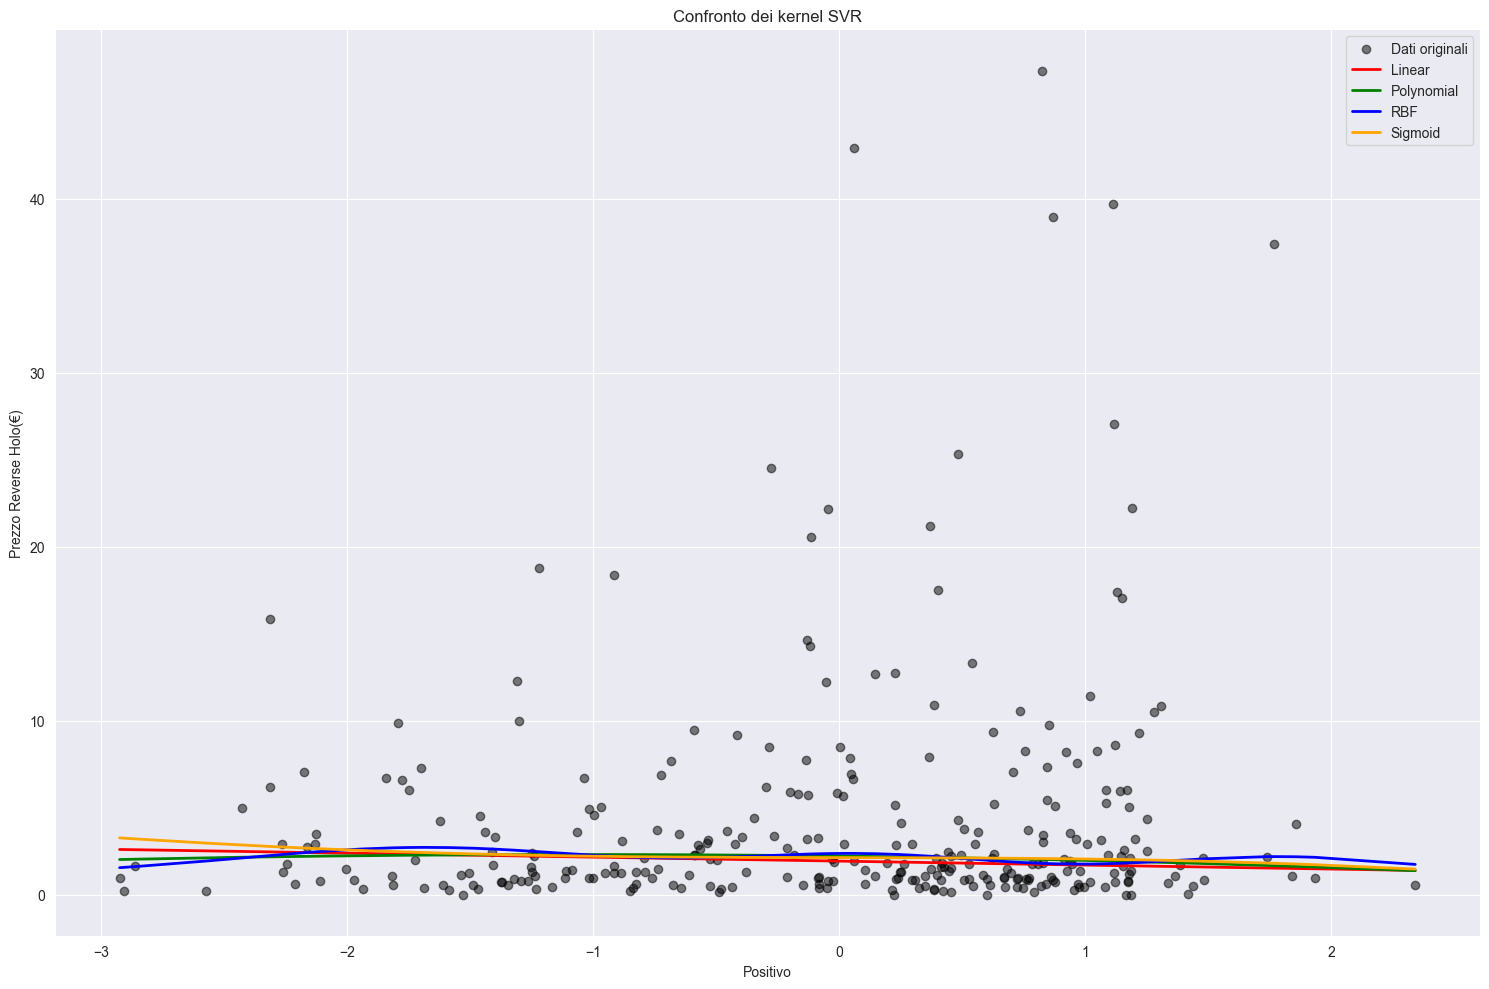

In [43]:
def plot_svr_kernels(X_test_scaled, y_test, svr_y_pred_linear, svr_y_pred_poly, svr_y_pred_rbf, svr_y_pred_sigmoid):
    plt.figure(figsize=(15, 10))

   
    df = pd.DataFrame({
        'X_test': X_test_scaled.flatten(),
        'y_test': y_test,
        'y_pred_linear': svr_y_pred_linear,
        'y_pred_poly': svr_y_pred_poly,
        'y_pred_rbf': svr_y_pred_rbf,
        'y_pred_sigmoid': svr_y_pred_sigmoid
    })


    df_sorted = df.sort_values('X_test')

  
    plt.scatter(df_sorted['X_test'], df_sorted['y_test'], color='black', label='Dati originali', alpha=0.5)

   
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_linear'], color='red', label='Linear', linewidth=2)
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_poly'], color='green', label='Polynomial', linewidth=2)
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_rbf'], color='blue', label='RBF', linewidth=2)
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_sigmoid'], color='orange', label='Sigmoid', linewidth=2)

    plt.xlabel('Positivo')
    plt.ylabel('Prezzo Reverse Holo(€)')
    plt.title('Confronto dei kernel SVR')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_svr_kernels(X_test_scaled,y_test,svr_y_pred_linear,svr_y_pred_poly,svr_y_pred_rbf,svr_y_pred_sigmoid)

PLOT RISULTATI SVR

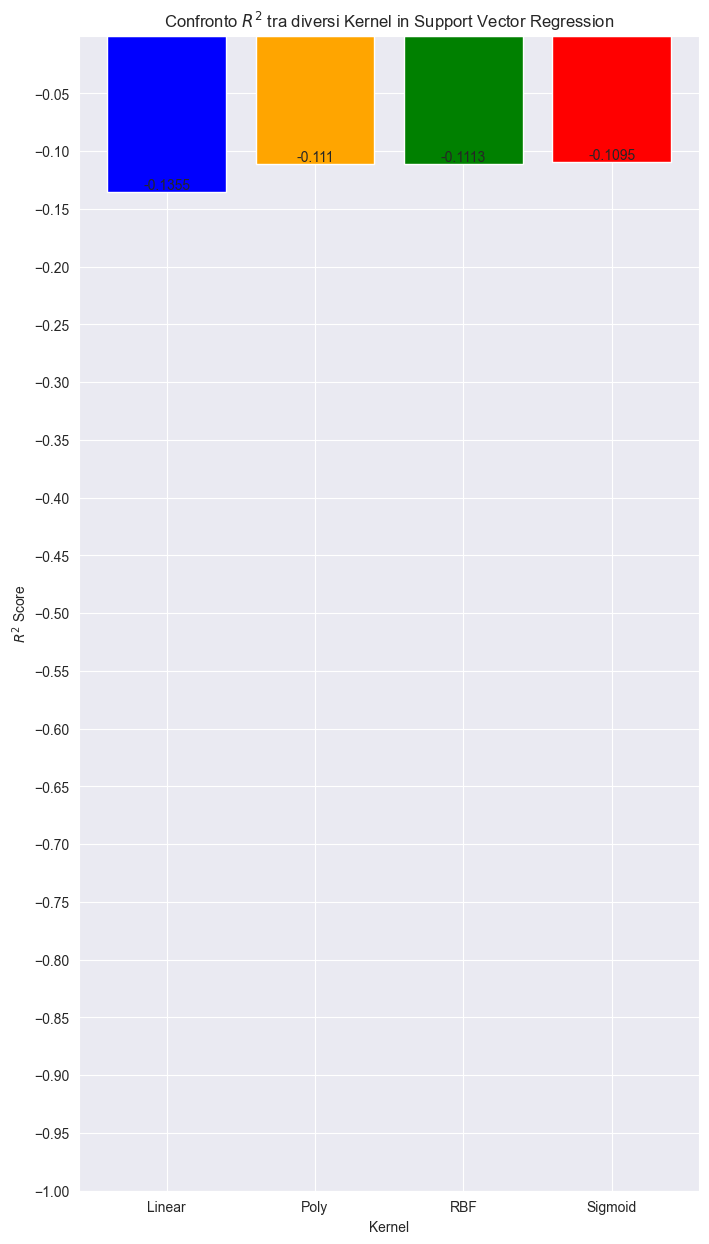

In [44]:
results = pd.DataFrame({
    'Kernel': ['Linear', 'Poly', 'RBF', 'Sigmoid'],
    'R2': [svr_r2_linear,svr_r2_poly,svr_r2_rbf,svr_r2_sigmoid]
})


plt.figure(figsize=(8,15))
bars = plt.bar(results['Kernel'], results['R2'], color=['blue', 'orange', 'green', 'red'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')


plt.ylim(-1, 0)  
plt.yticks(np.arange(-1, 0, 0.05)) 


plt.xlabel('Kernel')
plt.ylabel('$R^2$ Score')
plt.title('Confronto $R^2$ tra diversi Kernel in Support Vector Regression')

plt.show()



KERNEL RIDGE REGRESSION (KRR)

In [ ]:
X = df[['Positivo']]
y = df['Prezzo Reverse Holo(€)']


'''divisione in training set e test set'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'''normalizzazione'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


'''linear kernel'''
krr_linear = KernelRidge(kernel='linear')

'''polynomial kernel'''
krr_poly = KernelRidge(kernel='poly')
'''radial kernel'''
krr_rbf = KernelRidge(kernel='rbf')
'''sigmoid kernel'''
krr_sigmoid = KernelRidge(kernel='sigmoid')

'''grid search'''
krr_param_grid_poly_sigmoid = {
    'alpha': [0.0001,0.001,0.01,0.1,1,10, 100],
    'degree': [2, 3, 4],  
    'coef0': [0, 1, 2],  
    'gamma': [0.0001,0.001, 0.01, 0.1, 1, 10]  
}

krr_param_grid_linear = {
    'alpha':[0.0001,0.001,0.01,0.1,1,10, 100] 
}


krr_grid_search_linear = GridSearchCV(krr_linear, krr_param_grid_linear, cv=5)
krr_grid_search_poly = GridSearchCV(krr_poly,krr_param_grid_poly_sigmoid, cv=5)
krr_grid_search_rbf = GridSearchCV(krr_rbf,krr_param_grid_poly_sigmoid, cv=5)
krr_grid_search_sigmoid = GridSearchCV(krr_sigmoid,krr_param_grid_poly_sigmoid, cv=5)


'''fitting modelli'''
krr_grid_search_linear.fit(X_train_scaled, y_train)
krr_grid_search_poly.fit(X_train_scaled, y_train)
krr_grid_search_rbf.fit(X_train_scaled, y_train)
krr_grid_search_sigmoid.fit(X_train_scaled, y_train)


krr_linear_pred = krr_grid_search_linear.best_estimator_
krr_poly_pred = krr_grid_search_poly.best_estimator_
krr_rbf_pred = krr_grid_search_rbf.best_estimator_
krr_sigmoid_pred = krr_grid_search_sigmoid.best_estimator_


'''prediction'''
krr_y_pred_linear = krr_linear_pred.predict(X_test_scaled)
krr_y_pred_poly = krr_poly_pred.predict(X_test_scaled)
krr_y_pred_rbf = krr_rbf_pred.predict(X_test_scaled)
krr_y_pred_sigmoid = krr_sigmoid_pred.predict(X_test_scaled)

'''valutazione modelli'''
krr_mse_linear = mean_squared_error(y_test,krr_y_pred_linear)
krr_r2_linear = r2_score(y_test,krr_y_pred_linear)

krr_mse_poly = mean_squared_error(y_test,krr_y_pred_poly)
krr_r2_poly = r2_score(y_test,krr_y_pred_poly)

krr_mse_rbf = mean_squared_error(y_test,krr_y_pred_rbf)
krr_r2_rbf = r2_score(y_test,krr_y_pred_rbf)

krr_mse_sigmoid = mean_squared_error(y_test,krr_y_pred_sigmoid)
krr_r2_sigmoid = r2_score(y_test,krr_y_pred_sigmoid)

print("Ecco i risultati di KRR per ogni kernel utilizzato:\n"
      f"MSE linear: {krr_mse_linear}\n"
      f"R2 linear: {krr_r2_linear}\n"
      f"MSE poly: {krr_mse_poly}\n"
      f"R2 poly: {krr_r2_poly}\n"
      f"MSE rbf: {krr_mse_rbf}\n"
      f"R2 rbf: {krr_r2_rbf}\n"
      f"MSE sigmoid: {krr_mse_sigmoid}\n"
      f"R2 sigmoid: {krr_r2_sigmoid}")


PLOT MODELLO KRR

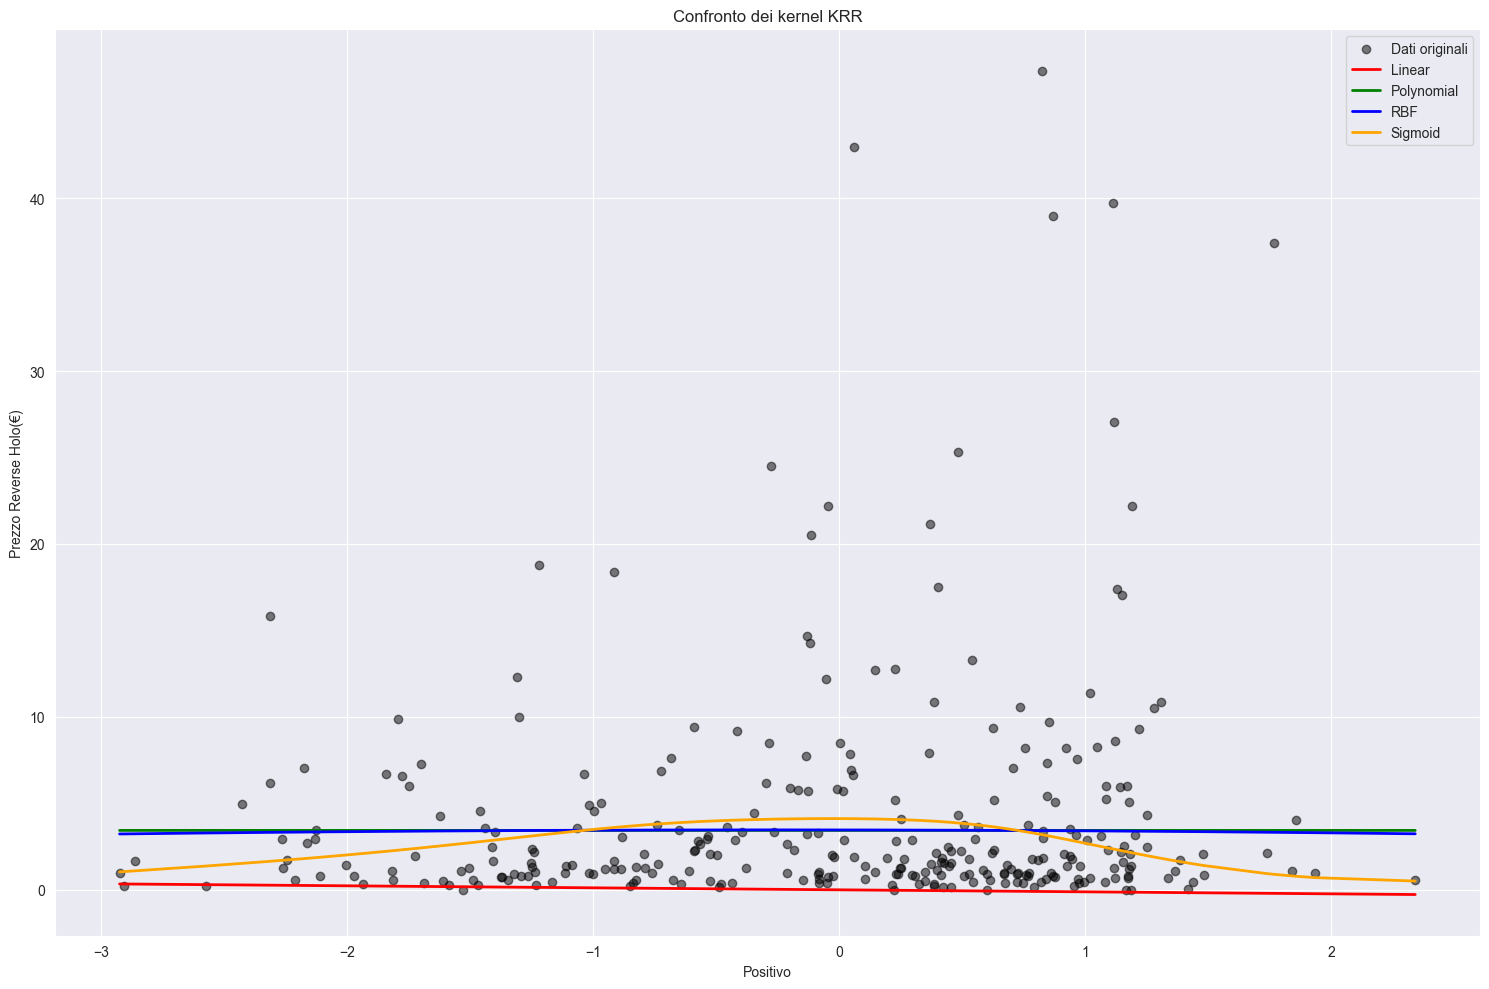

In [46]:
def plot_krr_kernels(X_test_scaled, y_test, krr_y_pred_linear, krr_y_pred_poly, krr_y_pred_rbf, krr_y_pred_sigmoid):
    plt.figure(figsize=(15, 10))

   
    df = pd.DataFrame({
        'X_test': X_test_scaled.flatten(),
        'y_test': y_test,
        'y_pred_linear': krr_y_pred_linear,
        'y_pred_poly': krr_y_pred_poly,
        'y_pred_rbf': krr_y_pred_rbf,
        'y_pred_sigmoid': krr_y_pred_sigmoid
    })


    df_sorted = df.sort_values('X_test')

  
    plt.scatter(df_sorted['X_test'], df_sorted['y_test'], color='black', label='Dati originali', alpha=0.5)

   
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_linear'], color='red', label='Linear', linewidth=2)
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_poly'], color='green', label='Polynomial', linewidth=2)
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_rbf'], color='blue', label='RBF', linewidth=2)
    plt.plot(df_sorted['X_test'], df_sorted['y_pred_sigmoid'], color='orange', label='Sigmoid', linewidth=2)

    plt.xlabel('Positivo')
    plt.ylabel('Prezzo Reverse Holo(€)')
    plt.title('Confronto dei kernel KRR')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_krr_kernels(X_test_scaled,y_test,krr_y_pred_linear,krr_y_pred_poly,krr_y_pred_rbf,krr_y_pred_sigmoid)

PLOT RISULTATI KRR

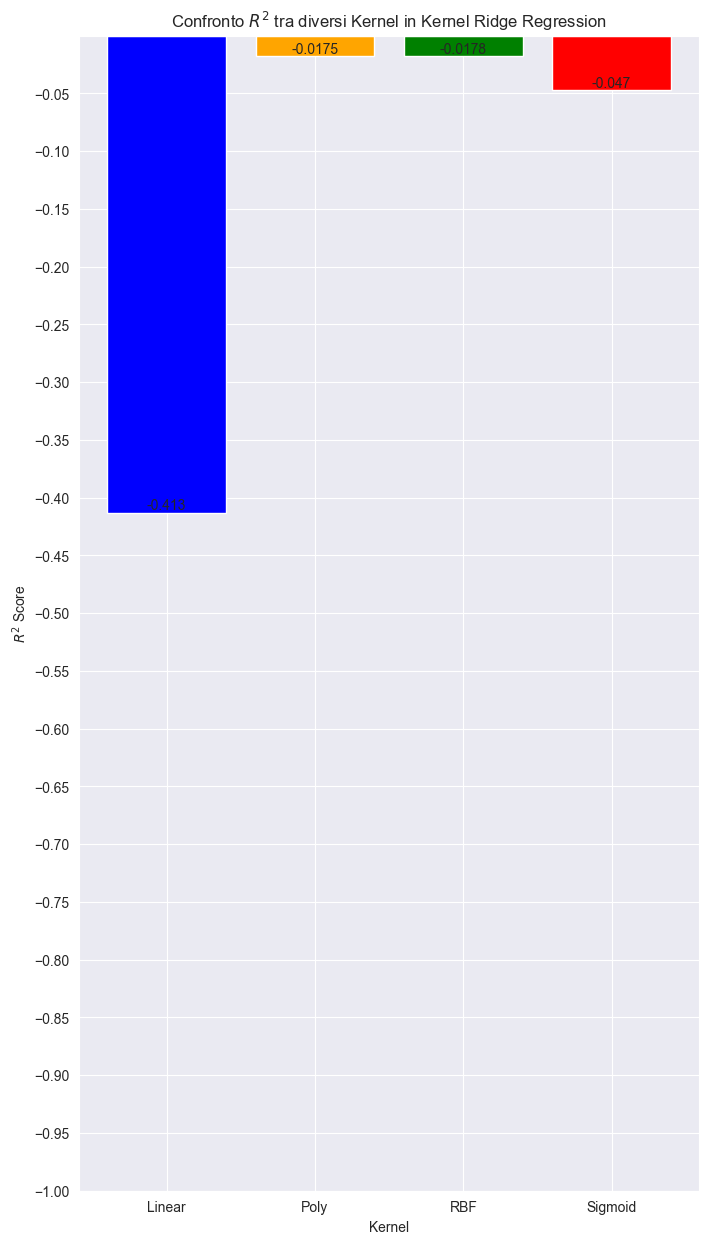

In [47]:
results = pd.DataFrame({
    'Kernel': ['Linear', 'Poly', 'RBF', 'Sigmoid'],
    'R2': [krr_r2_linear,krr_r2_poly,krr_r2_rbf,krr_r2_sigmoid]
})


plt.figure(figsize=(8,15))
bars = plt.bar(results['Kernel'], results['R2'], color=['blue', 'orange', 'green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')


plt.ylim(-1,0)  
plt.yticks(np.arange(-1, 0, 0.05))  

plt.xlabel('Kernel')
plt.ylabel('$R^2$ Score')
plt.title('Confronto $R^2$ tra diversi Kernel in Kernel Ridge Regression')


plt.show()


